In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
import csv
import numpy as np

In [0]:
from PIL import Image

In [0]:
import matplotlib.pyplot as plt

In [0]:
path = Config.data_path()
path

PosixPath('/root/.fastai/data')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/emotion/'

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shauryaselangia","key":"08d799fae499e54ba0ea035adef6d63e"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json 

kaggle.json


In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge -p {path}

403 - Forbidden


In [0]:
! 7za -bd -y -so x {path}/fer2013.tar.gz | tar xf - -C {path.as_posix()}

In [0]:
path = 'gdrive/My Drive'

In [0]:
(path).ls()

AttributeError: ignored

In [0]:
df = pd.read_csv('gdrive/My Drive/fer/fer2013.csv')
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [0]:
tfms = get_transforms(do_flip=False, max_zoom = 1)

with open('employee_birthday.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

In [0]:
os.mkdir(path + '/fer/train/0')
os.mkdir(path + '/fer/train/1')
os.mkdir(path + '/fer/train/2')
os.mkdir(path + '/fer/train/3')
os.mkdir(path + '/fer/train/4')
os.mkdir(path + '/fer/train/5')
os.mkdir(path + '/fer/train/6')

gdrive	sample_data


In [0]:
!ls 'gdrive/My Drive/fer/train/'

0  1  2  3  4  5  6


In [0]:
with open('gdrive/My Drive/fer/fer2013.csv') as csv_file:
    reader = csv.reader(csv_file, delimiter = ',')
    rowcnt = 0
    for row in reader:
        if rowcnt == 0:
            rowcnt += 1
        else:
            x = [int(i) for i in row[1].split()]    
            x = np.asarray(x)
            x = np.resize(x, (48,48))
            plt.imsave('gdrive/My Drive/fer/train/{}/{:03d}.jpg'.format(row[0], rowcnt), x)
            rowcnt += 1

In [0]:
!ls 'gdrive/My Drive/fer/train/3'

### Finally the data has been loaded to the directory '/home/jupyter/.fastai/data/fer/fer2013/train' in subsequent folders 0-6 according to the emotion

We'll start training the model now. We load it first

In [0]:
tfms = get_transforms(do_flip=False, max_zoom = 1)
np.random.seed(42)
data = ImageDataBunch.from_folder(path = 'gdrive/My Drive/fer/train', train = ".", ds_tfms=tfms, bs=64, size = 192, valid_pct=0.3, num_workers=4).normalize(imagenet_stats)
for itemList in ["train_dl", "valid_dl", "fix_dl", "test_dl"]:
    itemList = getattr(data, itemList)
    if itemList: itemList.x.convert_mode = "L"

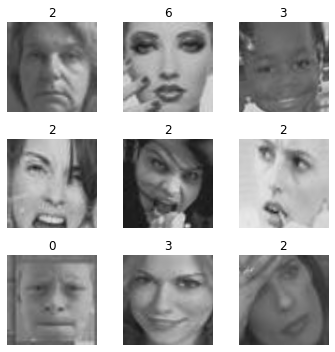

In [0]:
data.show_batch(rows=3, figsize=(5,5))

In [0]:
learn.loss_fn = F.mse_loss

In [0]:
#making resnet34 learner using fastai
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['0', '1', '2', '3', '4', '5', '6'], 7, 25121, 10766)

In [0]:
#freezing model allows only the latter layers to be trained. 
#This is desirable since we are using a pretrained model and only the last few layers we've added are untrained, so we'll train them first
learn.freeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


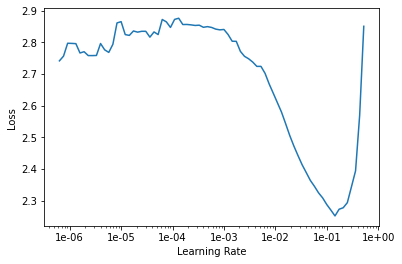

In [0]:
learn.recorder.plot()

In [0]:
lr = 1e-2

In [0]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.420920,1.318097,0.505016,0.494984,02:39
1,1.163531,1.074470,0.597808,0.402192,02:37
2,1.084332,1.011283,0.622887,0.377113,02:38
3,1.051972,1.010110,0.623258,0.376742,02:37
4,0.999079,0.970080,0.647037,0.352963,02:37
5,0.971106,0.965042,0.640721,0.359279,02:36
6,0.949856,0.943778,0.651960,0.348040,02:38
7,0.914983,0.923108,0.656976,0.343024,02:36
8,0.884635,0.916644,0.658183,0.341817,02:36
9,0.880207,0.917098,0.659391,0.340609,02:34


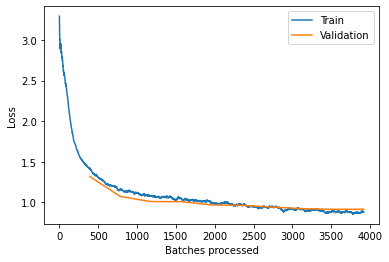

In [0]:
learn.recorder.plot_losses()

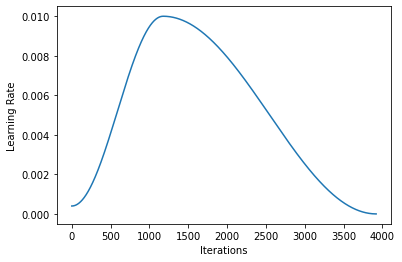

In [0]:
learn.recorder.plot_lr()

In [0]:
learn.save('stage-1-34-96(acc=56.8)')

In [0]:
learn.save('stage-1-34-192(acc=65.9)')

In [0]:
learn.save('stage-1-50')

In [0]:
learn.save('stage-1-50-96(acc=59.6)')

In [0]:
learn.save('stage-1-34-192(acc=60.3)')

In [0]:
learn.save('stage-1-50-192(acc=65)')

In [0]:
learn.load('stage-1-50-192(acc=65)');

In [0]:
#Now we unfreeze the model to allow training on all layers. 
#Now that the layers we added are fine-tuned, lets try to get some improvement in accuracy by training all layers
learn.unfreeze()

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


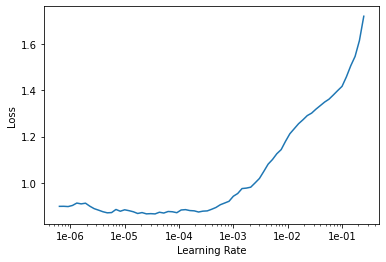

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,lr/5))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.420837,1.168331,0.656325,0.343675,02:41
1,0.236685,1.138552,0.683819,0.316181,02:41


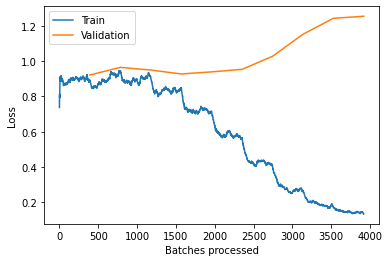

In [0]:
learn.recorder.plot_losses()

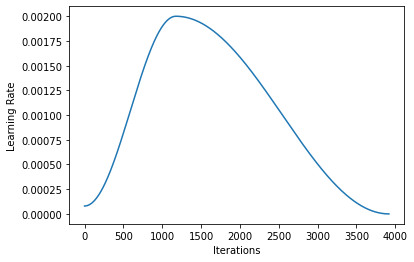

In [0]:
learn.recorder.plot_lr()

In [0]:
learn.save('stage-2-50')

In [0]:
learn.save('stage-2-34-96(acc==63.7)')

In [0]:
learn.load('stage-2-34-96(acc==63.7)')

In [0]:
learn.save('stage-2-34-192(acc==68.5)')

In [0]:
learn.load('stage-2-34-192(acc==68.5)')

In [0]:
learn.save('final')

Using resnet 34, 192 pixel image size after 10 epochs on both frozen and unfrozen model, an accuracy of 68.4 was acheived

In [0]:
learn.export('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1.exp.pkl')

In [0]:
doc(cnn_learner)

In [0]:
defaults.device = torch.device('cpu')

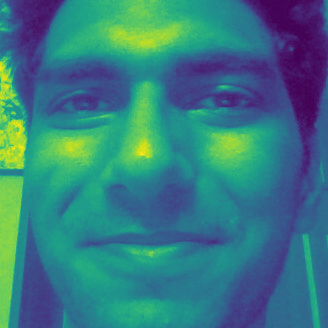

In [0]:
img = open_image('/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/webcam_selfie.jpg', convert_mode='L')
img

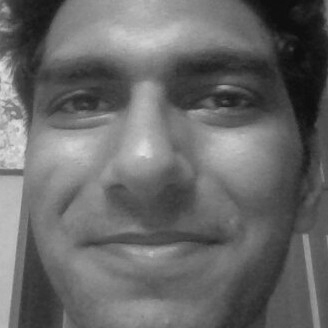

In [0]:
x = image2np(img.data*255).astype(np.uint8)
k = PIL.Image.fromarray(x)
k

In [0]:
doc(open_image)

 Emotions : 0 = Angry, 1 = Disgust, 2 = Fear, 3 = Happy, 4 = Sad, 5 = Surprise, 6 = Neutral

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 3